A principal ideia dessa analise é buscar insigths sobre os times que jogaram as quartas de final da maior competição de clubes do mundo a ***UEFA Champions League***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

In [2]:
df = pd.read_csv('UCLQuarterFinals.csv')
print(df.head())
print(df.shape)

   year code            name round   league region decade superliga  \
0  1981  LIV    Liverpool FC     W  England  Big 5  1980s       Yes   
1  1981  MAD  Real Madrid CF    RU    Spain  Big 5  1980s       Yes   
2  1981  BMN       FC Bayern    SF  Germany  Big 5  1980s        No   
3  1981  INT  FC Inter Milan    SF    Italy  Big 5  1980s       Yes   
4  1981  BEL        Red Star    QF   Serbia   East  1980s        No   

        city  areacode   metropol        pop       gdp         country  \
0  Liverpool     UK006  Liverpool  1533860.0   50484.0  United Kingdom   
1     Madrid     ES001     Madrid  6791667.0  342534.0           Spain   
2    München     DE003     Munich  2883373.0  241407.0         Germany   
3     Milano     IT002      Milan  5145657.0  301366.0           Italy   
4   Belgrade  Belgrade        NaN        NaN       NaN             NaN   

  eurostat  ecb cowc   cown  
0       UK   GB  UKG  200.0  
1       ES   ES  SPN  230.0  
2       DE   DE  GMY  255.0  
3       

É um dataset pequeno, contem apenas 328 linhas, e 18 colunas, a primeira olhada podemos dar atençao ao nome dos times, a região, a liga a qual pertencem.

In [3]:
print(df.isna().sum())

year          0
code          0
name          0
round         0
league        0
region        0
decade        0
superliga     0
city          0
areacode      0
metropol     34
pop          34
gdp          39
country       9
eurostat      9
ecb           9
cowc          9
cown          9
dtype: int64


temos alguns dados ausentes para que possamos tratar, aparentemente a um padrao entre eles, muito provavel devido a falta de imformaçao acabou que nao foi possivel preencher.

In [4]:
print(df.describe())

              year           pop            gdp        cown
count   328.000000  2.940000e+02     289.000000  319.000000
mean   2001.000000  4.502595e+06  231375.318339  264.592476
std      11.850238  3.703125e+06  220342.517591   76.018390
min    1981.000000  2.760970e+05    8056.000000  200.000000
25%    1991.000000  1.760085e+06   76575.000000  220.000000
50%    2001.000000  3.097965e+06  206526.000000  230.000000
75%    2011.000000  5.145657e+06  284400.000000  325.000000
max    2021.000000  1.546245e+07  913737.000000  640.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       328 non-null    int64  
 1   code       328 non-null    object 
 2   name       328 non-null    object 
 3   round      328 non-null    object 
 4   league     328 non-null    object 
 5   region     328 non-null    object 
 6   decade     328 non-null    object 
 7   superliga  328 non-null    object 
 8   city       328 non-null    object 
 9   areacode   328 non-null    object 
 10  metropol   294 non-null    object 
 11  pop        294 non-null    float64
 12  gdp        289 non-null    float64
 13  country    319 non-null    object 
 14  eurostat   319 non-null    object 
 15  ecb        319 non-null    object 
 16  cowc       319 non-null    object 
 17  cown       319 non-null    float64
dtypes: float64(3), int64(1), object(14)
memory usage: 46.2+ KB
None


podemos ver tambem que temos colunas com o tipo de dado errado, como por exemplo o ano, esta como int, quando devia ser do tipo date.
Vamos dropar os valores ausentes, e tambem alterar o tipo da coluna, para começar a analise

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

Agora que apagamos os valores ausentes, e checamos se havia duplicadas, podemos mexer nas colunas.

In [9]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [10]:
df.dtypes

In [11]:
df

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
0,1981-01-01,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
1,1981-01-01,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
2,1981-01-01,BMN,FC Bayern,SF,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
3,1981-01-01,INT,FC Inter Milan,SF,Italy,Big 5,1980s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
5,1981-01-01,SPA,Spartak Moscow,QF,Russia,East,1980s,No,Moscow,RU001,Moscow,12506468.0,284400.0,Russia,RU,RU,RUS,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2021-01-01,PSG,Paris SG,SF,France,Big 5,2010s,No,Paris,FR001,Paris,12914803.0,913737.0,France,FR,FR,FRN,220.0
324,2021-01-01,LIV,Liverpool FC,QF,England,Big 5,2010s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
325,2021-01-01,BMN,FC Bayern,QF,Germany,Big 5,2010s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
326,2021-01-01,POR,FC Porto,QF,Portugal,Small,2010s,No,Porto,PT002,Porto,1272189.0,38974.0,Portugal,PT,PT,POR,235.0


Agora vamos ver quais times mais ganharam a principal competição de clubes do mundo!!

In [12]:
uefa_w = df[df['round'] == 'W']
uefa_w

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
0,1981-01-01,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
8,1982-01-01,AST,Aston Villa FC,W,England,Big 5,1980s,No,Birmingham,UK002,West Midlands urban area,3097965.0,112240.0,United Kingdom,UK,GB,UKG,200.0
16,1983-01-01,HAM,Hamburg,W,Germany,Big 5,1980s,No,Hamburg,BE002,Antwerp,1110442.0,66122.0,Germany,DE,DE,GMY,255.0
24,1984-01-01,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
32,1985-01-01,JUV,Juventus FC,W,Italy,Big 5,1980s,Yes,Torino,IT004,Turin,1760085.0,76575.0,Italy,IT,IT,ITA,325.0
48,1987-01-01,POR,FC Porto,W,Portugal,Small,1980s,No,Porto,PT002,Porto,1272189.0,38974.0,Portugal,PT,PT,POR,235.0
56,1988-01-01,PSV,PSV Eindhoven,W,Netherlands,Small,1980s,No,Eindhoven,NL005,Eindhoven,753778.0,46945.0,Netherlands,NL,NL,NTH,210.0
64,1989-01-01,MIL,AC Milan,W,Italy,Big 5,1990s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
72,1990-01-01,MIL,AC Milan,W,Italy,Big 5,1990s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
88,1992-01-01,BAR,FC Barcelona,W,Spain,Big 5,1990s,Yes,Barcelona,ES002,Barcelona,4985549.0,218318.0,Spain,ES,ES,SPN,230.0


In [13]:
uefa_w['name'].value_counts()

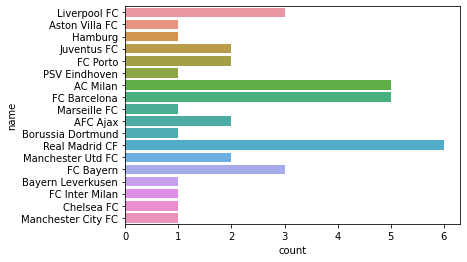

In [14]:
sns.countplot(y='name', data=uefa_w)
plt.show()

Ja podemos ver que o Real Madri foi o time que mais ganhou o torneio, em seguida tem o Barcelona e o Milan
Agora que vimos os maiores campeoes, podemos ver quem mais teve quase o prazer de ganhar esse grande torneio

In [15]:
uefa_vice = df[df['round'] == 'RU']
uefa_vice

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
1,1981-01-01,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
9,1982-01-01,BMN,FC Bayern,RU,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
17,1983-01-01,JUV,Juventus FC,RU,Italy,Big 5,1980s,Yes,Torino,IT004,Turin,1760085.0,76575.0,Italy,IT,IT,ITA,325.0
25,1984-01-01,ROM,AS Roma,RU,Italy,Big 5,1980s,No,Roma,IT001,Rome,4429025.0,215715.0,Italy,IT,IT,ITA,325.0
33,1985-01-01,LIV,Liverpool FC,RU,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
41,1986-01-01,FCB,FC Barcelona,RU,Spain,Big 5,1980s,Yes,Barcelona,ES002,Barcelona,4985549.0,218318.0,Spain,ES,ES,SPN,230.0
49,1987-01-01,BMN,FC Bayern,RU,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
57,1988-01-01,BEN,SL Benfica,RU,Portugal,Small,1980s,No,Lisbon,PT001,Lisbon,2976356.0,122547.0,Portugal,PT,PT,POR,235.0
73,1990-01-01,BEN,SL Benfica,RU,Portugal,Small,1990s,No,Lisbon,PT001,Lisbon,2976356.0,122547.0,Portugal,PT,PT,POR,235.0
81,1991-01-01,MAR,Marseille FC,RU,France,Big 5,1990s,No,Marseille,FR203,Marseille,1260223.0,53884.0,France,FR,FR,FRN,220.0


In [16]:
uefa_vice['name'].value_counts()

a primeira vista vemos que a juventus foi a equipe que mais foi vice campea, agora vamos ver de maneira mais organizada em um grafico

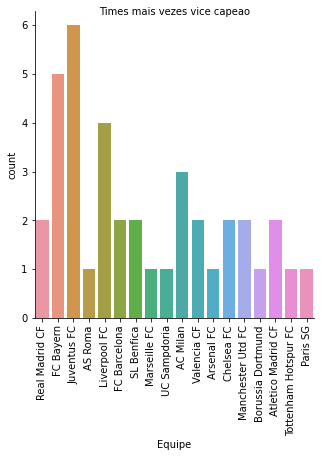

In [17]:
g = sns.catplot(x='name', data=uefa_vice, kind='count')
g.fig.suptitle('Times mais vezes vice capeao', fontsize=10)
g.set(xlabel='Equipe')
plt.xticks(rotation=90)
plt.show()

agora podemos ver algumas coisas interessantes depois ver ver esses dois graficos, real madri foi o time que mais ganhou o torneio, porem houve duas oportunidades que o mesmo nao chegou a consquistar, ja o time da juventus que foi campeao duas vezes, foi o time que mais chegou a final, e nao conseguiu o tao sonhado caneco, e o time alemao bayer de munique que foi vice campeao em 5 oportunidades, ganhou em outras 3.

In [18]:
uefa_nv = df[df['round'] != 'W']
uefa_nv['name'].value_counts()

In [19]:

uefa_nv = df[df['round'] == 'RU']
uefa_nv


,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
1,1981-01-01,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
9,1982-01-01,BMN,FC Bayern,RU,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
17,1983-01-01,JUV,Juventus FC,RU,Italy,Big 5,1980s,Yes,Torino,IT004,Turin,1760085.0,76575.0,Italy,IT,IT,ITA,325.0
25,1984-01-01,ROM,AS Roma,RU,Italy,Big 5,1980s,No,Roma,IT001,Rome,4429025.0,215715.0,Italy,IT,IT,ITA,325.0
33,1985-01-01,LIV,Liverpool FC,RU,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
41,1986-01-01,FCB,FC Barcelona,RU,Spain,Big 5,1980s,Yes,Barcelona,ES002,Barcelona,4985549.0,218318.0,Spain,ES,ES,SPN,230.0
49,1987-01-01,BMN,FC Bayern,RU,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
57,1988-01-01,BEN,SL Benfica,RU,Portugal,Small,1980s,No,Lisbon,PT001,Lisbon,2976356.0,122547.0,Portugal,PT,PT,POR,235.0
73,1990-01-01,BEN,SL Benfica,RU,Portugal,Small,1990s,No,Lisbon,PT001,Lisbon,2976356.0,122547.0,Portugal,PT,PT,POR,235.0
81,1991-01-01,MAR,Marseille FC,RU,France,Big 5,1990s,No,Marseille,FR203,Marseille,1260223.0,53884.0,France,FR,FR,FRN,220.0


In [20]:

common = uefa_vice.merge(uefa_w, on=["name"])
result = uefa_vice[~uefa_vice.name.isin(common.name)]
print(result)

          year code                  name round    league region decade  \
25  1984-01-01  ROM               AS Roma    RU     Italy  Big 5  1980s   
57  1988-01-01  BEN            SL Benfica    RU  Portugal  Small  1980s   
73  1990-01-01  BEN            SL Benfica    RU  Portugal  Small  1990s   
89  1992-01-01  SAM          UC Sampdoria    RU     Italy  Big 5  1990s   
153 2000-01-01  VAL           Valencia CF    RU     Spain  Big 5  2000s   
161 2001-01-01  VAL           Valencia CF    RU     Spain  Big 5  2000s   
201 2006-01-01  ARS            Arsenal FC    RU   England  Big 5  2000s   
265 2014-01-01  ATM    Atletico Madrid CF    RU     Spain  Big 5  2010s   
281 2016-01-01  ATM    Atletico Madrid CF    RU     Spain  Big 5  2010s   
305 2019-01-01  TOT  Tottenham Hotspur FC    RU   England  Big 5  2010s   
313 2020-01-01  PSG              Paris SG    RU    France  Big 5  2010s   

    superliga      city areacode  metropol         pop       gdp  \
25         No      Roma    IT00

In [21]:
print(result[['name', 'year']])

                     name       year
25                AS Roma 1984-01-01
57             SL Benfica 1988-01-01
73             SL Benfica 1990-01-01
89           UC Sampdoria 1992-01-01
153           Valencia CF 2000-01-01
161           Valencia CF 2001-01-01
201            Arsenal FC 2006-01-01
265    Atletico Madrid CF 2014-01-01
281    Atletico Madrid CF 2016-01-01
305  Tottenham Hotspur FC 2019-01-01
313              Paris SG 2020-01-01


Podemos agora ver quais times foram vice, e nunca ganharam a UEFA
*tao perto, mas tao longe*

In [22]:
df.head()

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
0,1981-01-01,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
1,1981-01-01,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
2,1981-01-01,BMN,FC Bayern,SF,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
3,1981-01-01,INT,FC Inter Milan,SF,Italy,Big 5,1980s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
5,1981-01-01,SPA,Spartak Moscow,QF,Russia,East,1980s,No,Moscow,RU001,Moscow,12506468.0,284400.0,Russia,RU,RU,RUS,365.0


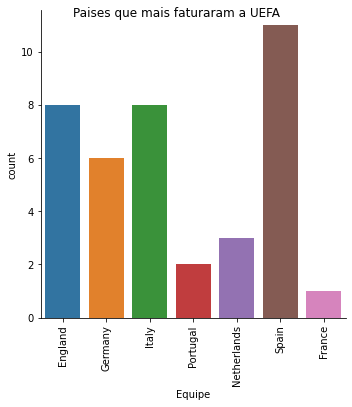

In [23]:
g = sns.catplot(x='league', data=uefa_w, kind='count')
g.fig.suptitle('Paises que mais faturaram a UEFA')
g.set(xlabel='Equipe')
plt.xticks(rotation=90)
plt.show()

Podemos ver que a uma grande diversidades nos paises que ja faturaram a uefa, regioes como Espanha, Inglaterra, Italia e Alemanha domiman o rank